> ### EEE3314-02: Introduction to Artificial Intelligence

# Assignment \# III: Logistic Regression

### *Assignement Instructions:*
- Write a program implementing a particular algorithm to solve a given problem.   
- <h4><span style="color:red">**Report and discuss your results. Analyze the algorithm, theoretically and empirically. **</span> </h4>

### *Collaboration policy:*
- You may discuss the questions.   
- Each student writes their own answers.   
- **Write on your homework anyone with whom you collaborate.**   
- Each student must write their own code for the programming part (**if not you will get a F grade**).

In [1]:
%load_ext autoreload
%autoreload 2

import datetime
print("This code is written at " + str(datetime.datetime.now()))

This code is written at 2020-03-10 04:36:51.112643


## Problem description

We will implement $Stochastic Gradient Descent (SGD)$ to optimize a logistic regression model to predict whether a given patient have diabetes or not. In clinical informatics, machine learning approahces have been widely adopted to predict clinically adverse events based on patient data. For this problem, we will use the Pima Indians Diabetes Data Set. The data on each patient include:

- $\texttt{label}$: The output class variable (0 - normal or 1 - diabetes)  
- $\texttt{num_preg}$: Number of times pregnant 
- $\texttt{PGC}$: Plasma glucose concentration at 2 hours in an oral glucose tolerance test (PGC)
- $\texttt{DBP}$: Diastolic blood pressure (DBP)
- $\texttt{tricept}$: Triceps skin fold thickness (tricept, unit: mm)  
- $\texttt{insulin}$: 2-Hour serum insulin (insulin, unit: μU/ml)
- $\texttt{BMI}$: Body mass index (BMI)
- $\texttt{ped_func}$: Diabetes pedigree function
- $\texttt{age}$: Age (age, years)

Among all 768 patients, we will separate 500 patients as training data ($\texttt{logistic_regression_training_data.csv}$) and 268 patients as test data ($\texttt{logistic_regression_test_data.csv}$).

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from P03 import load_data

In [4]:
train_csv_path = 'logistic_regression_training_data.csv'
test_csv_path = 'logistic_regression_testing_data.csv'
df_train = pd.read_csv(train_csv_path)
df_test = pd.read_csv(test_csv_path)

In [5]:
df_train.head()

,label,num_preg,PGC,DBP,tricept,insulin,BMI,ped_func,age
0,1,0.470588,0.758794,0.639344,0.507937,0.35,0.639344,0.187020,0.250000
1,1,0.235294,0.663317,0.000000,0.000000,0.00,0.490313,0.095645,0.033333
2,0,0.058824,0.467337,0.459016,0.174603,0.00,0.335320,0.144748,0.016667
3,0,0.058824,0.547739,0.311475,0.285714,0.20,0.344262,0.140478,0.083333
4,1,0.176471,0.869347,0.688525,0.523810,0.79,0.532042,0.076857,0.016667


In [6]:
X_train, y_train, features = load_data(df_train)
X_test, y_test, _ = load_data(df_test)

X = {'train': X_train, 'test': X_test}
y = {'train': y_train, 'test': y_test}

In [7]:
from P03 import sigmoid
sigmoid(1)

0.7310585786300049

In [8]:
features

array(['num_preg', 'PGC', 'DBP', 'tricept', 'insulin', 'BMI', 'ped_func',
       'age'], dtype='<U8')

### I. Logistic regression method using SGD




### P1.1   
(*40 points*) P1.1 Implement a logistic regression method using SGD. You may assume that the data is randomly ordered. 

In [9]:
from P03 import LogisticRegressionSGD

In [10]:
iterations = 100000
lr = 0.8
number_of_ensemble = 1000

In [11]:
logistic_regression = LogisticRegressionSGD(lr, iterations, number_of_ensemble)
w = logistic_regression.fit(X, y)

In [12]:
print(w)

[  4.47115018  12.05188976  -0.81097969  -0.63289615  -1.00704401
   7.18833854   2.7908209    1.4022448  -11.63873807]


### P1.2

(*10 points*) P1.2 Plot $\bar L$ every 100 iterations, e.g., [100, 200, 300,...], defined as

$\begin{equation} \bar L(T) = \frac{1}{T}\sum_{t=1}^{T} (\hat y^t - y^t)^2 \end{equation}$,   
where $T$ is the number of iterations and $\hat y^t$ (either 0 or 1) is the predicted label for sample $\bf{x}^t$ using the weights $\bf{w}^{t-1}$. 

> Initialize the weight vector $w$ and the bias $w_0$ to 0.    
> Learning rate = 0.8.    
> Number of iterations = 100,000.


Text(0, 0.5, 'Average loss')

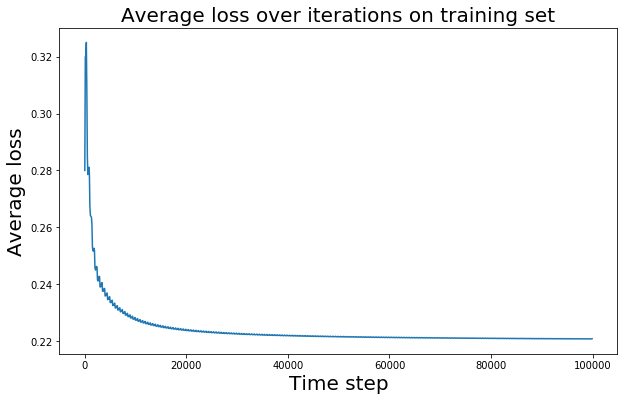

In [13]:
# plot average loss L over the number of steps T
fig = plt.figure(figsize=(10,6))
plt.plot(np.arange(len(logistic_regression.avg_loss_over_itr)) * 100, 
         logistic_regression.avg_loss_over_itr)
plt.title('Average loss over iterations on training set', fontsize=20)
plt.xlabel('Time step', fontsize=20)
plt.ylabel('Average loss', fontsize=20)

### P1.3

(*10 points*) P1.3 Use the model weights to predict whether each patient in the test set has diabetes, for every 100 steps. Plot average of squared errors of your prediction.

<center>$\begin{equation} TestError = \frac{1}{N_{test}}\sum_{i=1}^{N_{test}} (\hat y^i - y^i)^2 \end{equation}$</center>

Text(0, 0.5, 'Squared error')

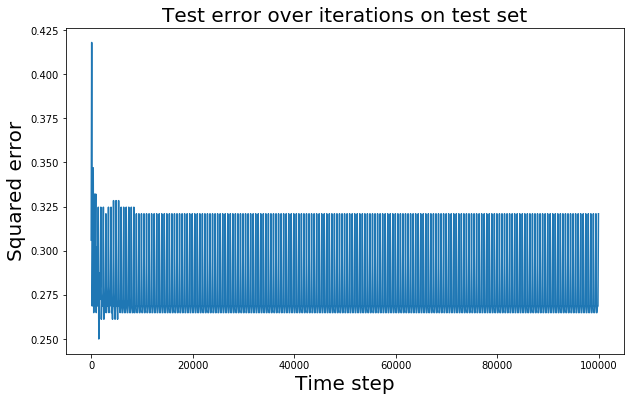

In [14]:
# plot sum of squared error over iterations
plt.figure(figsize=(10,6))
plt.plot(np.arange(len(logistic_regression.test_error_over_itr)) * 100, 
         logistic_regression.test_error_over_itr)
plt.title('Test error over iterations on test set', fontsize=20)
plt.xlabel('Time step', fontsize=20)
plt.ylabel('Squared error', fontsize=20)

### II. Model evaluation and feature interpretations 


### P2.1   
(*10 points*) P2.1 Using the model after 100,000 iterations, measure test accuracy. Accuracy is the fraction of predictions our model got right. That is, it is computed by Number of correct predictions / Total number of predictions.

In [15]:
accuracy = logistic_regression.get_accuracy(X['test'], y['test'], w)
print(accuracy)

0.6791044776119403


### P2.2

(*5 points*) P2.2 SGD oscillates around a solution (noisy convergence). In order to minimize risk of picking bad weights, we typically use an average model. Measure test accuracy again, using an average model over the weights for the last 1000 iterations


In [16]:
logistic_regression.w_ensemble

array([  3.98788775,  11.74163817,  -1.17313448,  -0.03423808,
        -0.92481426,   7.30162095,   2.57262878,   0.41453668,
       -12.30863863])

In [17]:
accuracy_ensemble = logistic_regression.get_accuracy(
    X['test'], y['test'], logistic_regression.w_ensemble)
print(accuracy_ensemble)

0.7276119402985075


### P2.3


(*5 points*) P2.3 Report the weights of following features, $\texttt{BMI}$, $\texttt{insulin}$, and $\texttt{PGC}$

In [18]:
from P03 import get_indices_of_fields

In [19]:
fields = np.array(['BMI', 'insulin', 'PGC'])
indices = get_indices_of_fields(fields, features)

In [20]:
indices

[5, 4, 1]

In [21]:
logistic_regression.w_ensemble[indices]

array([ 7.30162095, -0.92481426, 11.74163817])


# Result Analysis and Discussion (20 points)



For result analysis and discussion, you can use all functions defined above. Also you can make your own functions or scripts.

Your answer must include the analysis about:

- Difference between Stochastic Gradient Descent and Batch Gradient Descent.
- Influence of each feature in classifying diabetes.
- Effect of applying the ensemble technique.